# Logistic Regression Classifer for Cat Recognition

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
#from PIL import image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

***** SEC 1: Problem Set setup *****

In [44]:
#load data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [45]:
####Validate dataset
#   index = 5
#   plt.imshow(train_set_x_orig[index])
#   print('y = ' + str(train_set_y[:,index]) + ', it\'s a \"'
#        + classes[np.squeeze(train_set_y[:,index])].decode('utf-8') + '\" picture')

In [46]:
#number of training examples
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1] # pixel: heigh and weight of a training sample

# flatten matrix image into single vector of shape (num_px * num_px * 3, 1)
train_set_x_flatten = train_set_x_orig.reshape(m_train, -1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T

# Standardize dataset by divide by 255
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

***** SEC 2: Algorithm *****

In [47]:
#### helper function ###
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### initalize parameters ####
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

#### Propagation ####
def propagate(w, b, X, Y):
    
    # forward
    m = X.shape[1] # X == train_set_x ([pixel_product, size])
    score = np.dot(w.T, X) + b
    A = sigmoid(score)
    cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    # backward
    dscore = A - Y
    dw = 1 / m * np.dot(X, dscore.T)
    db = 1 / m * np.sum(dscore)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw': dw, 'db': db}
    
    return grads, cost

#w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
#grads, cost = propagate(w, b, X, Y)
#grads, cost

#### Optimization ####
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print('Cost after iteration %i: %f' %(i, cost))
    
    params = {'w': w, 'b': b}
    return params, costs ## note variable scope is within entire function


### Prediction ####
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    assert(Y_prediction.shape == (1, m))
    
    # for the for loop, or use: Y_prediction = np.where(A <= 0.5, 0, 1)
    return Y_prediction

***** SEC 3: Build Model *****

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


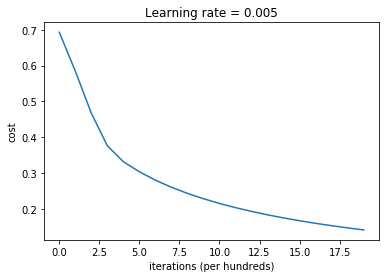

In [48]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, 
          learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, costs = optimize(w, b, X_train, Y_train, 
                                    num_iterations, learning_rate, print_cost)
    w = parameters['w']
    b = parameters['b']
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {
        'costs': costs,
        'Y_prediction_test': Y_prediction_test,
        'Y_prediction_train': Y_prediction_train,
        'w': w,
        'b': b,
        'learning_rate': learning_rate,
        'num_iterations': num_iterations
    }
    
    return d

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, 
          learning_rate = 0.005, print_cost = True)

### test ###
# index = 1
# plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
# print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Learning rate = ' + str(d['learning_rate']))
plt.show()

***** SEC 4: Learning Rate Analysis *****

learning rate is : 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is : 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is : 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



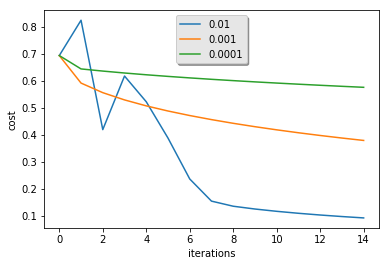

In [49]:
def optimize_learning_rate():
    learning_rates = [0.01, 0.001, 0.0001]
    models = {}
    for i in learning_rates:
        print("learning rate is : " + str(i))
        models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, 
                               num_iterations = 1500, learning_rate = i, print_cost = False)
        print ('\n' + "-------------------------------------------------------" + '\n')
    
    for i in learning_rates:
        plt.plot(np.squeeze(models[str(i)]['costs']),
                label = str(models[str(i)]['learning_rate']))
        
    plt.ylabel('cost')
    plt.xlabel('iterations')
    
    legend = plt.legend(loc = 'upper center', shadow = True)
    frame = legend.get_frame()
    frame.set_facecolor('0.90')
    plt.show()

optimize_learning_rate()